<a href="https://colab.research.google.com/github/Estocastic/Hello-world/blob/master/MOD_BPN_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. CARGA DE DATOS Y RECODIFICACIÓN

In [87]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df = pd.read_csv("/content/drive/My Drive/Datos_BPN2023/datos_generados_V2/df_para_modelo.csv", sep = ";")

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19407 entries, 0 to 19406
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Nacimiento              19407 non-null  object 
 1   Sitio Parto                  19407 non-null  object 
 2   Sexo                         19407 non-null  object 
 3   Peso                         19407 non-null  float64
 4   Talla                        19407 non-null  float64
 5   Parto Atendido Por           19407 non-null  object 
 6   Tiempo Gestación             19407 non-null  float64
 7   Número Consultas Prenatales  19406 non-null  float64
 8   Tipo Parto                   19407 non-null  object 
 9   Multiplicidad Embarazo       19407 non-null  object 
 10  APGAR1                       19309 non-null  float64
 11  APGAR5                       19309 non-null  float64
 12  Grupo Sanguineo              19245 non-null  object 
 13  Factor RH       

In [90]:
df = df.drop(['Factor RH','Grupo Sanguineo','Numero Documento Madre','Año'], axis=1).copy()

In [91]:
dfm = df.dropna()

In [92]:
dfm['def'].value_counts()

0    19028
1      279
Name: def, dtype: int64

In [93]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19307 entries, 0 to 19406
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Nacimiento              19307 non-null  object 
 1   Sitio Parto                  19307 non-null  object 
 2   Sexo                         19307 non-null  object 
 3   Peso                         19307 non-null  float64
 4   Talla                        19307 non-null  float64
 5   Parto Atendido Por           19307 non-null  object 
 6   Tiempo Gestación             19307 non-null  float64
 7   Número Consultas Prenatales  19307 non-null  float64
 8   Tipo Parto                   19307 non-null  object 
 9   Multiplicidad Embarazo       19307 non-null  object 
 10  APGAR1                       19307 non-null  float64
 11  APGAR5                       19307 non-null  float64
 12  Pertenencia Étnica           19307 non-null  object 
 13  Edad Madre      

In [94]:
print(f'Multiplicidad de embarazo \n', dfm['Multiplicidad Embarazo'].unique())
print(f'Edad Madre \n ', dfm['Edad Madre'].unique())
print(f'Último Año Estudios Madre \n ', dfm['Último Año Estudios Madre'].unique())
print(f'periodo_inter \n ', dfm['periodo_inter'].unique())

Multiplicidad de embarazo 
 ['SIMPLE' 'MULTIPLE']
Edad Madre 
  [27 21 34 24 17 26 28 15 25 19 29 18 32 20 40 22 23 33 43 31 16 30 39 35
 36 46 38 44 37 14 42 41 13 12 52 45 47 48 54 50 51]
Último Año Estudios Madre 
  ['SIN INFORMACIÓN' 'ED BÁSICA' 'ED SUPERIOR' 'SIN EDUCACIÓN'
 'ED MAESTRANTE' 'ED DOCTORAL']
periodo_inter 
  ['un año a dos años' 'primeriza' 'más de dos años' 'menos de un año'
 'perdido']


Recodificación de variables:

In [95]:
intervalos = [x for x in range(10, 55, 5)]
df['Edad Madre']= pd.cut(df['Edad Madre'], bins=intervalos, right=False)

In [96]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Aplica Label Encoding a la columna "Edad Madre"
df['Edad Madre'] = label_encoder.fit_transform(df['Edad Madre'])


In [97]:
# Para la columna 'Multiplicidad de Embarazo'
custom_mapping_multiplicidad = {'SIMPLE': 0, 'MULTIPLE': 1}

# Para la columna 'periodo_inter'
custom_mapping_periodo_inter = {
    'primeriza': 0,
    'menos de un año': 1,
    'un año a dos años': 2,
    'más de dos años': 3,
    'perdido': 4
}

In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Aplica Label Encoding utilizando el mapeo personalizado
dfm['Multiplicidad Embarazo'] = dfm['Multiplicidad Embarazo'].map(custom_mapping_multiplicidad)
dfm['periodo_inter'] = dfm['periodo_inter'].map(custom_mapping_periodo_inter)

<ipython-input-98-b2b08c9bf70a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['Multiplicidad Embarazo'] = dfm['Multiplicidad Embarazo'].map(custom_mapping_multiplicidad)
<ipython-input-98-b2b08c9bf70a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['periodo_inter'] = dfm['periodo_inter'].map(custom_mapping_periodo_inter)


NOMINALES:

In [99]:
categorical_columns = ['Area Nacimiento', 'Sitio Parto', 'Sexo', 'Parto Atendido Por', 'Tipo Parto', 'Pertenencia Étnica', 'Estado Conyugal Madre', 'Municipio Residencia', 'Área Residencia', 'Último Año Estudios Madre', 'Régimen Seguridad Social']

In [100]:
# Aplica One-Hot Encoding a las columnas categóricas
df_encoded = pd.get_dummies(dfm, columns=categorical_columns)

In [101]:
df_encoded

,Peso,Talla,Tiempo Gestación,Número Consultas Prenatales,Multiplicidad Embarazo,APGAR1,APGAR5,Edad Madre,Número Hijos Nacidos Vivos,Numero Embarazos,...,Último Año Estudios Madre_ED DOCTORAL,Último Año Estudios Madre_ED MAESTRANTE,Último Año Estudios Madre_ED SUPERIOR,Último Año Estudios Madre_SIN EDUCACIÓN,Último Año Estudios Madre_SIN INFORMACIÓN,Régimen Seguridad Social_CONTRIBUTIVO,Régimen Seguridad Social_ESPECIAL,Régimen Seguridad Social_EXCEPCIÓN,Régimen Seguridad Social_NO ASEGURADO,Régimen Seguridad Social_SUBSIDIADO
0,2000.0,44.0,40.0,6.0,0,8.0,9.0,27,6.0,6.0,...,0,0,0,0,1,0,0,0,0,1
1,1710.0,44.0,40.0,5.0,0,7.0,9.0,21,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,2100.0,44.0,38.0,5.0,1,9.0,10.0,34,4.0,3.0,...,0,0,0,0,0,0,0,0,0,1
3,1710.0,44.0,40.0,5.0,0,7.0,9.0,21,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,2425.0,46.0,38.0,7.0,0,9.0,10.0,24,2.0,2.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19402,2435.0,45.0,37.0,8.0,0,9.0,9.0,31,1.0,1.0,...,0,0,1,0,0,1,0,0,0,0
19403,2065.0,47.0,37.0,15.0,0,10.0,10.0,20,1.0,1.0,...,0,0,1,0,0,0,0,0,0,1
19404,2290.0,47.0,37.0,5.0,0,9.0,9.0,37,1.0,1.0,...,0,0,1,0,0,1,0,0,0,0
19405,2375.0,48.0,37.0,8.0,0,9.0,9.0,34,2.0,2.0,...,0,0,1,0,0,1,0,0,0,0


In [102]:
dff = df_encoded.copy()

# 2. MODELADO CON DATOS DESBALANCEADOS




---


En este capítulo, nos adentraremos en la fase inicial de nuestro proceso de modelado, donde nos enfocaremos en el análisis del comportamiento natural de los datos en su estado desbalanceado. Antes de aplicar las técnicas de muestreo para desbalanceo de los datos, es fundamental comprender cómo se comportan los modelos en la configuración de datos desbalanceados antes de aplicar cualquier transformación.

La razón principal para comenzar con esta etapa reside en la necesidad de evaluar la capacidad de nuestros modelos para identificar y clasificar correctamente las clases minoritarias en su contexto natural. Al comprender  las limitaciones y el rendimiento inicial en datos desbalanceados, estaremos en una mejor posición para tomar decisiones informadas sobre las estrategias de balanceo y ajuste de modelos que se discutirán más adelante en este proceso de modelado.

Para llevar a cabo esta fase inicial, es crucial definir una partición de los datos que nos permita entrenar y evaluar nuestros modelos de manera efectiva. En este sentido, proponemos una partición que respalde la evaluación rigurosa de nuestros modelos en términos de precisión, recall, F1-Score y otras métricas pertinentes.

Sugerimos la siguiente partición de datos para esta etapa:



*   Conjunto de Entrenamiento (Train): 75% del total de datos disponibles.
*   Conjunto de Validación (Validation): 25% del total de datos disponibles.

In [18]:
dff['def'].value_counts()

0    19028
1      279
Name: def, dtype: int64

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Divide los datos en características (X) y variable objetivo (y)
X = dff.drop(columns=['def'])  # Excluye la columna 'def' que es la variable objetivo
y = dff['def']  # Variable objetivo

# Realiza la división de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70, stratify=y)

# Imprime las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)


Dimensiones del conjunto de entrenamiento (X_train, y_train): (14480, 55) (14480,)
Dimensiones del conjunto de prueba (X_test, y_test): (4827, 55) (4827,)


In [104]:
y_train.value_counts()

0    14271
1      209
Name: def, dtype: int64

## Regresión Logistico (LR)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Carga los datos (asegúrate de haber realizado la división previamente)
# X_train, X_test, y_train, y_test = ...

# Inicializa el modelo de Regresión Logística
model_logistic = LogisticRegression(random_state=42, max_iter=1000)

# Entrena el modelo en el conjunto de entrenamiento
model_logistic.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_logistic = model_logistic.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_logistic)
report = classification_report(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Imprime las métricas de rendimiento
print("Exactitud del modelo de Regresión Logística:", accuracy)
print("Informe de clasificación:\n", report)
print("Matriz de Confusión: \n", conf_matrix)


Exactitud del modelo de Regresión Logística: 0.9869484151646986
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4757
           1       0.71      0.17      0.28        70

    accuracy                           0.99      4827
   macro avg       0.85      0.59      0.63      4827
weighted avg       0.98      0.99      0.98      4827

Matriz de Confusión: 
 [[4752    5]
 [  58   12]]


## Maquinas de vectores soporte (SVM) :

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
# Inicializa el modelo SVM
model_svm = SVC(random_state=42)

# Entrena el modelo en el conjunto de entrenamiento
model_svm.fit(X_train, y_train)


SVC(random_state=42)

In [24]:
# Realiza predicciones en el conjunto de prueba
y_pred_svm = model_svm.predict(X_test)

# Evalúa el rendimiento del modelo SVM
accuracy = accuracy_score(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Imprime las métricas de rendimiento y la matriz de confusión
print("Exactitud del modelo SVM:", accuracy)
print("Informe de clasificación:\n", report)
print("Matriz de Confusión:\n", conf_matrix)


Exactitud del modelo SVM: 0.9854982390718873
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4757
           1       0.00      0.00      0.00        70

    accuracy                           0.99      4827
   macro avg       0.49      0.50      0.50      4827
weighted avg       0.97      0.99      0.98      4827

Matriz de Confusión:
 [[4757    0]
 [  70    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Árbol de Decisión (DT)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carga los datos (asegúrate de haber realizado la división previamente)
# X_train, X_test, y_train, y_test = ...


In [26]:
# Inicializa el modelo de Árbol de Decisión
model_decision_tree = DecisionTreeClassifier(random_state=42)

# Entrena el modelo en el conjunto de entrenamiento
model_decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [27]:
# Realiza predicciones en el conjunto de prueba
y_pred_decision_tree = model_decision_tree.predict(X_test)

# Evalúa el rendimiento del modelo de Árbol de Decisión
accuracy = accuracy_score(y_test, y_pred_decision_tree)
report = classification_report(y_test, y_pred_decision_tree)
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)

# Imprime las métricas de rendimiento y la matriz de confusión
print("Exactitud del modelo de Árbol de Decisión:", accuracy)
print("Informe de clasificación:\n", report)
print("Matriz de Confusión:\n", conf_matrix)

Exactitud del modelo de Árbol de Decisión: 0.976590014501761
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4757
           1       0.26      0.34      0.30        70

    accuracy                           0.98      4827
   macro avg       0.63      0.66      0.64      4827
weighted avg       0.98      0.98      0.98      4827

Matriz de Confusión:
 [[4690   67]
 [  46   24]]


## Random Forest (RF)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# Inicializa el modelo Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Entrena el modelo en el conjunto de entrenamiento
model_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
# Realiza predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Evalúa el rendimiento del modelo Random Forest
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Imprime las métricas de rendimiento y la matriz de confusión
print("Exactitud del modelo Random Forest:", accuracy)
print("Informe de clasificación:\n", report)
print("Matriz de Confusión:\n", conf_matrix)


Exactitud del modelo Random Forest: 0.9896415993370623
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4757
           1       0.95      0.30      0.46        70

    accuracy                           0.99      4827
   macro avg       0.97      0.65      0.73      4827
weighted avg       0.99      0.99      0.99      4827

Matriz de Confusión:
 [[4756    1]
 [  49   21]]


##  XGBOOST

In [31]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [32]:
# Inicializa el modelo XGBoost
model_xgboost = xgb.XGBClassifier(random_state=42)

# Entrena el modelo en el conjunto de entrenamiento
model_xgboost.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [33]:
# Realiza predicciones en el conjunto de prueba
y_pred_xgboost = model_xgboost.predict(X_test)

# Evalúa el rendimiento del modelo XGBoost
accuracy = accuracy_score(y_test, y_pred_xgboost)
report = classification_report(y_test, y_pred_xgboost)
conf_matrix = confusion_matrix(y_test, y_pred_xgboost)

# Imprime las métricas de rendimiento y la matriz de confusión
print("Exactitud del modelo XGBoost:", accuracy)
print("Informe de clasificación:\n", report)
print("Matriz de Confusión:\n", conf_matrix)


Exactitud del modelo XGBoost: 0.9890200952972861
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4757
           1       0.87      0.29      0.43        70

    accuracy                           0.99      4827
   macro avg       0.93      0.64      0.71      4827
weighted avg       0.99      0.99      0.99      4827

Matriz de Confusión:
 [[4754    3]
 [  50   20]]


##  K Vecinos Más Cercanos - KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [35]:
# Inicializa el modelo KNN (por ejemplo, con k=5)
model_knn = KNeighborsClassifier(n_neighbors=5)

# Entrena el modelo en el conjunto de entrenamiento
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [36]:
# Realiza predicciones en el conjunto de prueba
y_pred_knn = model_knn.predict(X_test)

# Evalúa el rendimiento del modelo KNN
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Imprime las métricas de rendimiento y la matriz de confusión
print("Exactitud del modelo KNN:", accuracy)
print("Informe de clasificación:\n", report)
print("Matriz de Confusión:\n", conf_matrix)


Exactitud del modelo KNN: 0.9850839030453697
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4757
           1       0.00      0.00      0.00        70

    accuracy                           0.99      4827
   macro avg       0.49      0.50      0.50      4827
weighted avg       0.97      0.99      0.98      4827

Matriz de Confusión:
 [[4755    2]
 [  70    0]]


## Red Neuronal

In [37]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Inicializa la Red Neuronal
model_nn = Sequential()

# Agrega capas ocultas (ajusta el número de neuronas y funciones de activación según tu problema)
model_nn.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

# Compila el modelo
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrena el modelo en el conjunto de entrenamiento
model_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
453/453 [==============================] - 8s 3ms/step - loss: 0.1059 - accuracy: 0.9682
Epoch 2/10
453/453 [==============================] - 1s 3ms/step - loss: 0.0566 - accuracy: 0.9858
Epoch 3/10
453/453 [==============================] - 1s 3ms/step - loss: 0.0530 - accuracy: 0.9863
Epoch 4/10
453/453 [==============================] - 1s 3ms/step - loss: 0.0501 - accuracy: 0.9869
Epoch 5/10
453/453 [==============================] - 1s 3ms/step - loss: 0.0482 - accuracy: 0.9874
Epoch 6/10
453/453 [==============================] - 1s 3ms/step - loss: 0.0463 - accuracy: 0.9877
Epoch 7/10
453/453 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9885
Epoch 8/10
453/453 [==============================] - 1s 3ms/step - loss: 0.0429 - accuracy: 0.9882
Epoch 9/10
453/453 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9894
Epoch 10/10
453/453 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9892

In [40]:
# Realiza predicciones en el conjunto de prueba
y_pred_nn = (model_nn.predict(X_test_scaled) > 0.5).astype("int32")

# Evalúa el rendimiento de la Red Neuronal
accuracy = accuracy_score(y_test, y_pred_nn)
report = classification_report(y_test, y_pred_nn)
conf_matrix = confusion_matrix(y_test, y_pred_nn)

# Imprime las métricas de rendimiento y la matriz de confusión
print("Exactitud de la Red Neuronal:", accuracy)
print("Informe de clasificación:\n", report)
print("Matriz de Confusión:\n", conf_matrix)


151/151 [==============================] - 0s 1ms/step
Exactitud de la Red Neuronal: 0.9869484151646986
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4757
           1       0.71      0.17      0.28        70

    accuracy                           0.99      4827
   macro avg       0.85      0.59      0.63      4827
weighted avg       0.98      0.99      0.98      4827

Matriz de Confusión:
 [[4752    5]
 [  58   12]]


## Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear una instancia del clasificador Naive Bayes Multinomial
naive_bayes_model = MultinomialNB()

# Entrenar el modelo en el conjunto de entrenamiento
naive_bayes_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes_model.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy}")

# Mostrar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Exactitud del modelo: 0.9757613424487259
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4757
           1       0.14      0.13      0.13        70

    accuracy                           0.98      4827
   macro avg       0.56      0.56      0.56      4827
weighted avg       0.97      0.98      0.98      4827

Matriz de Confusión:
[[4701   56]
 [  61    9]]


# 3. BALANCEO Y MODELADO

## Creación de datos balanceados

In [105]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

In [106]:
# Submuestreo tradicional
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)


In [107]:
from sklearn.utils import resample

# Sobremuestreo tradicional
X_train_minority = X_train[y_train == 1]
X_train_minority_upsampled = resample(X_train_minority,
                                      replace=True,
                                      n_samples=len(X_train[y_train == 0]),
                                      random_state=42)

X_train_oversampled = pd.concat([X_train[y_train == 0], X_train_minority_upsampled])
y_train_oversampled = y_train.loc[X_train_oversampled.index]


In [108]:
# Smote
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [109]:
# Combinación de SMOTE y submuestreo
X_train_combined, y_train_combined = SMOTE(random_state=42).fit_resample(X_train, y_train)
X_train_combined, y_train_combined = RandomUnderSampler(random_state=42).fit_resample(X_train_combined, y_train_combined)


In [110]:
print("Distribución de clases en el conjunto original:", y_train.value_counts())
print("Distribución de clases después del Submuestreo:", y_train_under.value_counts())
print("Distribución de clases después del Sobremuestreo:", y_train_oversampled.value_counts())
print("Distribución de clases después de SMOTE:", y_train_smote.value_counts())
print("Distribución de clases después de la combinación de técnicas:", y_train_combined.value_counts())


Distribución de clases en el conjunto original: 0    14271
1      209
Name: def, dtype: int64
Distribución de clases después del Submuestreo: 0    209
1    209
Name: def, dtype: int64
Distribución de clases después del Sobremuestreo: 0    14271
1    14271
Name: def, dtype: int64
Distribución de clases después de SMOTE: 0    14271
1    14271
Name: def, dtype: int64
Distribución de clases después de la combinación de técnicas: 0    14271
1    14271
Name: def, dtype: int64


## Modelo RL : balanceado

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
def train_evaluate_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)

    return accuracy, precision, recall, f1


In [ ]:
accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled = train_evaluate_model(X_train_oversampled, y_train_oversampled, X_test, y_test)
accuracy_smote, precision_smote, recall_smote, f1_smote = train_evaluate_model(X_train_smote, y_train_smote, X_test, y_test)
accuracy_under, precision_under, recall_under, f1_under = train_evaluate_model(X_train_under, y_train_under, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Resultados para Sobremuestreo Tradicional:", accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled)
print("Resultados para SMOTE:", accuracy_smote, precision_smote, recall_smote, f1_smote)
print("Resultados para Submuestreo:", accuracy_under, precision_under, recall_under, f1_under)


Resultados para Sobremuestreo Tradicional: 0.8442096540294178 0.0639386189258312 0.7142857142857143 0.11737089201877936
Resultados para SMOTE: 0.9778330225813134 0.2823529411764706 0.34285714285714286 0.3096774193548387
Resultados para Submuestreo: 0.8079552517091361 0.05036726128016789 0.6857142857142857 0.09384164222873902


## SMV : balanceado

In [ ]:
def train_evaluate_svm(X_train, y_train, X_test, y_test):
    model = SVC(probability=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)

    return accuracy, precision, recall, f1


In [ ]:
accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled = train_evaluate_svm(X_train_oversampled, y_train_oversampled, X_test, y_test)
accuracy_smote, precision_smote, recall_smote, f1_smote = train_evaluate_svm(X_train_smote, y_train_smote, X_test, y_test)
accuracy_under, precision_under, recall_under, f1_under = train_evaluate_svm(X_train_under, y_train_under, X_test, y_test)


In [ ]:
print("Resultados para Sobremuestreo Tradicional:", accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled)
print("Resultados para SMOTE:", accuracy_smote, precision_smote, recall_smote, f1_smote)
print("Resultados para Submuestreo:", accuracy_under, precision_under, recall_under, f1_under)


Resultados para Sobremuestreo Tradicional: 0.7833022581313446 0.02804642166344294 0.4142857142857143 0.052536231884057975
Resultados para SMOTE: 0.7621711207789518 0.025528169014084508 0.4142857142857143 0.04809286898839138
Resultados para Submuestreo: 0.8636834472757406 0.040625 0.37142857142857144 0.07323943661971831


## Arbol de decisión balanceado

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
def train_evaluate_decision_tree(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)

    return accuracy, precision, recall, f1


In [ ]:
accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled = train_evaluate_decision_tree(X_train_oversampled, y_train_oversampled, X_test, y_test)
accuracy_smote, precision_smote, recall_smote, f1_smote = train_evaluate_decision_tree(X_train_smote, y_train_smote, X_test, y_test)
accuracy_under, precision_under, recall_under, f1_under = train_evaluate_decision_tree(X_train_under, y_train_under, X_test, y_test)


In [ ]:
print("Resultados para Sobremuestreo Tradicional:", accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled)
print("Resultados para SMOTE:", accuracy_smote, precision_smote, recall_smote, f1_smote)
print("Resultados para Submuestreo:", accuracy_under, precision_under, recall_under, f1_under)


Resultados para Sobremuestreo Tradicional: 0.9811477107934535 0.3561643835616438 0.37142857142857144 0.36363636363636365
Resultados para SMOTE: 0.9753470064222084 0.26666666666666666 0.4 0.32
Resultados para Submuestreo: 0.667288170706443 0.03227771010962241 0.7571428571428571 0.06191588785046728


## Random Forest: Balanceado

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def train_evaluate_rf(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)

    return accuracy, precision, recall, f1


In [ ]:
accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled = train_evaluate_rf(X_train_oversampled, y_train_oversampled, X_test, y_test)
accuracy_smote, precision_smote, recall_smote, f1_smote = train_evaluate_rf(X_train_smote, y_train_smote, X_test, y_test)
accuracy_under, precision_under, recall_under, f1_under = train_evaluate_rf(X_train_under, y_train_under, X_test, y_test)

In [ ]:
print("Resultados para Sobremuestreo Tradicional:", accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled)
print("Resultados para SMOTE:", accuracy_smote, precision_smote, recall_smote, f1_smote)
print("Resultados para Submuestreo:", accuracy_under, precision_under, recall_under, f1_under)


Resultados para Sobremuestreo Tradicional: 0.9890200952972861 0.9047619047619048 0.2714285714285714 0.41758241758241754
Resultados para SMOTE: 0.9888129272840274 0.8636363636363636 0.2714285714285714 0.4130434782608695
Resultados para Submuestreo: 0.8048477315102548 0.0541922290388548 0.7571428571428571 0.10114503816793893


## XGBoost balanceado

In [ ]:
import xgboost as xgb


In [ ]:
def train_evaluate_xgboost(X_train, y_train, X_test, y_test):
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)

    return accuracy, precision, recall, f1


In [ ]:
accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled = train_evaluate_xgboost(X_train_oversampled, y_train_oversampled, X_test, y_test)
accuracy_smote, precision_smote, recall_smote, f1_smote = train_evaluate_xgboost(X_train_smote, y_train_smote, X_test, y_test)
accuracy_under, precision_under, recall_under, f1_under = train_evaluate_xgboost(X_train_under, y_train_under, X_test, y_test)


In [ ]:
print("Resultados para Sobremuestreo Tradicional:", accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled)
print("Resultados para SMOTE:", accuracy_smote, precision_smote, recall_smote, f1_smote)
print("Resultados para Submuestreo:", accuracy_under, precision_under, recall_under, f1_under)


Resultados para Sobremuestreo Tradicional: 0.9863269111249223 0.5454545454545454 0.34285714285714286 0.42105263157894735
Resultados para SMOTE: 0.9888129272840274 0.7666666666666667 0.32857142857142857 0.45999999999999996
Resultados para Submuestreo: 0.7397969753470064 0.040310077519379844 0.7428571428571429 0.07647058823529411


## KNN balanceado

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
def train_evaluate_knn(X_train, y_train, X_test, y_test, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)

    return accuracy, precision, recall, f1


In [ ]:
accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled = train_evaluate_knn(X_train_oversampled, y_train_oversampled, X_test, y_test)
accuracy_smote, precision_smote, recall_smote, f1_smote = train_evaluate_knn(X_train_smote, y_train_smote, X_test, y_test)
accuracy_under, precision_under, recall_under, f1_under = train_evaluate_knn(X_train_under, y_train_under, X_test, y_test)


In [ ]:
print("Resultados para Sobremuestreo Tradicional:", accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled)
print("Resultados para SMOTE:", accuracy_smote, precision_smote, recall_smote, f1_smote)
print("Resultados para Submuestreo:", accuracy_under, precision_under, recall_under, f1_under)


Resultados para Sobremuestreo Tradicional: 0.9674746219183759 0.16279069767441862 0.3 0.21105527638190955
Resultados para SMOTE: 0.9113320903252538 0.06971153846153846 0.4142857142857143 0.11934156378600823
Resultados para Submuestreo: 0.6863476279262481 0.026867627785058978 0.5857142857142857 0.05137844611528822


## Naive Bayes : Balanceado

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
def train_evaluate_naive_bayes(X_train, y_train, X_test, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)

    return accuracy, precision, recall, f1


In [ ]:
accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled = train_evaluate_naive_bayes(X_train_oversampled, y_train_oversampled, X_test, y_test)
accuracy_smote, precision_smote, recall_smote, f1_smote = train_evaluate_naive_bayes(X_train_smote, y_train_smote, X_test, y_test)
accuracy_under, precision_under, recall_under, f1_under = train_evaluate_naive_bayes(X_train_under, y_train_under, X_test, y_test)


In [ ]:
print("Resultados para Sobremuestreo Tradicional:", accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled)
print("Resultados para SMOTE:", accuracy_smote, precision_smote, recall_smote, f1_smote)
print("Resultados para Submuestreo:", accuracy_under, precision_under, recall_under, f1_under)


Resultados para Sobremuestreo Tradicional: 0.1858297078931013 0.016533066132264528 0.9428571428571428 0.03249630723781388
Resultados para SMOTE: 0.3391340377045784 0.017326732673267328 0.8 0.03391883706844337
Resultados para Submuestreo: 0.9424072923140667 0.12318840579710146 0.4857142857142857 0.19653179190751444


# 4. OPTIMIZACIÓN DE MODELOS

## INSTALACIÓN DE PYCARET

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.6 MB/s

In [ ]:
from pycaret.classification import *

## OPTIMIZACIÓN POR BÚSQUEDA ALEATORIA

Se quieren optimizar siete modelos (LR, SVM, DT, RF, XGB, KNN, NB) en cuatro conjuntos de datos distintos (X_train, X_train_under, X_train_over, X_train_smote) utilizando tanto búsqueda aleatoria como búsqueda en rejilla.

### OPT. BUSQUEDA ALEATORIA. DATOS SIN BALANCEO

In [ ]:
from pycaret.classification import *
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Py caret con Desbalanceados:

clf = setup(data=dff, target='def', train_size= 0.75, session_id=1, preprocess = False,
            fix_imbalance=False)


ModuleNotFoundError: ignored

In [ ]:
metricas_unb = pd.DataFrame()
model_params_unb = {}

# Lista de modelos para afinar
models = ['lr', 'svm', 'dt', 'rf', 'xgboost', 'knn', 'nb']

for m in models:
    model = create_model(m)
    tuned = tune_model(model, n_iter=20, optimize='Recall', search_algorithm='random', early_stopping=True, choose_better=True)

    # Obtener y almacenar las métricas medias
    mean_metrics = pull().loc['Mean']
    metricas_unb = metricas_unb.append(mean_metrics, ignore_index=True)

    # Obtener y almacenar los hiperparámetros del modelo afinado
    model_params_unb[m] = tuned.get_params()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9848,0.8880,0.2000,0.4000,0.2667,0.2599,0.2759
1,0.9855,0.8710,0.1429,0.5000,0.2222,0.2172,0.2620
2,0.9862,0.9223,0.1905,0.5714,0.2857,0.2805,0.3247
3,0.9876,0.9097,0.1905,0.8000,0.3077,0.3038,0.3868
4,0.9855,0.8833,0.0952,0.5000,0.1600,0.1561,0.2137
5,0.9862,0.7759,0.0952,0.6667,0.1667,0.1636,0.2486
6,0.9855,0.7501,0.0476,0.5000,0.0870,0.0846,0.1510
7,0.9841,0.8119,0.1429,0.3750,0.2069,0.2005,0.2248
8,0.9855,0.7881,0.0952,0.5000,0.1600,0.1561,0.2137


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:18:55
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


KeyboardInterrupt: ignored

In [ ]:
# Asignar nombres a las filas del DataFrame con los nombres de los modelos
metricas_unb.index = models

# Imprimir el DataFrame y el diccionario de hiperparámetros
print(metricas_unb)
print(model_params_unb)

Empty DataFrame
Columns: []
Index: [lr, svm, dt, rf, xgboost, knn, nb]
{}


### OPT. BUSQUEDA ALEATORIA. DATOS BALANCEADOS POR SUBMUESTREO

In [ ]:
# Crear la instancia de RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)

clf = setup(data=dff, target='def', train_size= 0.75, session_id=2, preprocess = False,
                  fix_imbalance=True, fix_imbalance_method=rus)

,Description,Value
0,Session id,2
1,Target,def
2,Target type,Binary
3,Original data shape,"(19307, 56)"
4,Transformed data shape,"(19307, 56)"
5,Transformed train set shape,"(14480, 56)"
6,Transformed test set shape,"(4827, 56)"
7,Numeric features,55


In [ ]:
metricas_under = pd.DataFrame()
model_params_under = {}

# Lista de modelos para afinar
models = ['lr', 'svm', 'dt', 'rf', 'xgboost', 'knn', 'nb']

for m in models:
    model = create_model(m)
    tuned = tune_model(model, n_iter=20, optimize='Recall', search_algorithm='random', early_stopping=False, choose_better=False)

    # Obtener y almacenar las métricas medias
    mean_metrics = pull().loc['Mean']
    metricas_under = metricas_under.append(mean_metrics, ignore_index=True)

    # Obtener y almacenar los hiperparámetros del modelo afinado
    model_params_under[m] = tuned.get_params()

In [ ]:
metricas_under.index = models

print(metricas_under.round(4))
print(model_params_under)

         Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
lr         0.8473  0.8405  0.7460  0.0677  0.1241  0.1003  0.1940
svm        0.9749  0.0000  0.2388  0.2005  0.2159  0.2034  0.2052
dt         0.9849  0.7047  0.1671  0.4203  0.2322  0.2264  0.2540
rf         0.9180  0.8447  0.6452  0.1084  0.1855  0.1649  0.2414
xgboost    0.9584  0.8293  0.5114  0.1794  0.2647  0.2486  0.2857
knn        0.9887  0.6480  0.2200  1.0000  0.3586  0.3553  0.4641
nb         0.5521  0.8268  0.8417  0.0286  0.0552  0.0281  0.0975
{'lr': {'C': 9.581999999999997, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}, 'svm': {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.4, 'fit_intercept': True, 'l1_ratio': 0.9300000001, '

### OPT. BUSQUEDA ALEATORIA. DATOS BALANCEADOS SOBREMUESTREO

In [ ]:
# Para sobremuestreo
clf_over = setup(data=dff, target='def', train_size= 0.75, session_id=3, preprocess = False,
                 fix_imbalance=True, fix_imbalance_method=RandomOverSampler(random_state = 42))


,Description,Value
0,Session id,3
1,Target,def
2,Target type,Binary
3,Original data shape,"(19307, 56)"
4,Transformed data shape,"(19307, 56)"
5,Transformed train set shape,"(14480, 56)"
6,Transformed test set shape,"(4827, 56)"
7,Numeric features,55


In [ ]:
metricas_over = pd.DataFrame()
model_params_over = {}

# Lista de modelos para afinar
models = ['lr', 'svm', 'dt', 'rf', 'xgboost', 'knn', 'nb']

for m in models:
    model = create_model(m)
    tuned = tune_model(model, n_iter=20, optimize='Recall', search_algorithm='random', early_stopping=True, choose_better=True)

    # Obtener y almacenar las métricas medias
    mean_metrics = pull().loc['Mean']
    metricas_over = metricas_over.append(mean_metrics, ignore_index=True)

    # Obtener y almacenar los hiperparámetros del modelo afinado
    model_params_over[m] = tuned.get_params()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9883,0.8061,0.2000,0.8000,0.3200,0.3162,0.3965
1,0.9848,0.7851,0.0476,0.3333,0.0833,0.0800,0.1215
2,0.9841,0.7694,0.0952,0.3333,0.1481,0.1426,0.1720
3,0.9855,0.9011,0.1429,0.5000,0.2222,0.2172,0.2620
4,0.9848,0.8601,0.1429,0.4286,0.2143,0.2085,0.2414
5,0.9848,0.8547,0.0476,0.3333,0.0833,0.0800,0.1215
6,0.9862,0.7229,0.0952,0.6667,0.1667,0.1636,0.2486
7,0.9876,0.8920,0.1905,0.8000,0.3077,0.3038,0.3868
8,0.9841,0.8725,0.0952,0.3333,0.1481,0.1426,0.1720


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8122,0.8011,0.7000,0.0500,0.0933,0.0693,0.1518
1,0.8246,0.7700,0.6667,0.0536,0.0993,0.0744,0.1535
2,0.8322,0.7960,0.7143,0.0595,0.1099,0.0854,0.1729
3,0.7907,0.9015,0.9048,0.0594,0.1114,0.0866,0.1999
4,0.8481,0.8578,0.7619,0.0693,0.1270,0.1031,0.1996
5,0.8336,0.8004,0.6190,0.0528,0.0974,0.0726,0.1451
6,0.8329,0.7241,0.5238,0.0453,0.0833,0.0582,0.1156
7,0.8280,0.8918,0.8095,0.0649,0.1201,0.0959,0.1981
8,0.8177,0.8665,0.7619,0.0582,0.1081,0.0834,0.1769


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9841,0.0000,0.1500,0.3333,0.2069,0.2000,0.2165
1,0.9848,0.0000,0.0000,0.0000,0.0000,-0.0013,-0.0032
2,0.9848,0.0000,0.0000,0.0000,0.0000,-0.0013,-0.0032
3,0.9855,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9848,0.0000,0.0000,0.0000,0.0000,-0.0013,-0.0032
5,0.9855,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9848,0.0000,0.0000,0.0000,0.0000,-0.0013,-0.0032
7,0.9855,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9779,0.0000,0.2381,0.2381,0.2381,0.2269,0.2269


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9751,0.0000,0.1500,0.1364,0.1429,0.1303,0.1304
1,0.9731,0.0000,0.0476,0.0500,0.0488,0.0351,0.0351
2,0.9744,0.0000,0.0952,0.1000,0.0976,0.0846,0.0846
3,0.9717,0.0000,0.2381,0.1667,0.1961,0.1821,0.1851
4,0.9717,0.0000,0.3333,0.2059,0.2545,0.2409,0.2482
5,0.9738,0.0000,0.1429,0.1304,0.1364,0.1231,0.1232
6,0.9738,0.0000,0.0476,0.0526,0.0500,0.0367,0.0368
7,0.9738,0.0000,0.3333,0.2258,0.2692,0.2564,0.2614
8,0.9758,0.0000,0.2857,0.2308,0.2553,0.2432,0.2446


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9738,0.6169,0.2500,0.1786,0.2083,0.1954,0.1982
1,0.9814,0.6621,0.3333,0.3500,0.3415,0.3320,0.3321
2,0.9717,0.6572,0.3333,0.2059,0.2545,0.2409,0.2482
3,0.9772,0.7304,0.4762,0.3125,0.3774,0.3663,0.3747
4,0.9751,0.6590,0.3333,0.2414,0.2800,0.2677,0.2713
5,0.9751,0.6824,0.3810,0.2581,0.3077,0.2955,0.3013
6,0.9758,0.6593,0.3333,0.2500,0.2857,0.2737,0.2766
7,0.9786,0.7545,0.5238,0.3438,0.4151,0.4047,0.4140
8,0.9751,0.6590,0.3333,0.2414,0.2800,0.2677,0.2713


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9862,0.5795,0.1000,0.5000,0.1667,0.1628,0.2193
1,0.9820,0.6232,0.1429,0.2727,0.1875,0.1793,0.1890
2,0.9820,0.5822,0.0952,0.2222,0.1333,0.1257,0.1374
3,0.9869,0.7187,0.3333,0.5833,0.4242,0.4181,0.4350
4,0.9890,0.7014,0.2381,1.0000,0.3846,0.3812,0.4852
5,0.9841,0.6018,0.0952,0.3333,0.1481,0.1426,0.1720
6,0.9848,0.7028,0.1429,0.4286,0.2143,0.2085,0.2414
7,0.9841,0.6999,0.3333,0.4375,0.3784,0.3705,0.3740
8,0.9827,0.8054,0.1429,0.3000,0.1935,0.1859,0.1991


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9876,0.8537,0.1500,0.7500,0.2500,0.2465,0.3320
1,0.9876,0.7164,0.1429,1.0000,0.2500,0.2473,0.3756
2,0.9883,0.8014,0.1905,1.0000,0.3200,0.3168,0.4339
3,0.9896,0.9349,0.2857,1.0000,0.4444,0.4408,0.5317
4,0.9890,0.8524,0.2381,1.0000,0.3846,0.3812,0.4852
5,0.9890,0.8425,0.2381,1.0000,0.3846,0.3812,0.4852
6,0.9903,0.8260,0.3333,1.0000,0.5000,0.4963,0.5745
7,0.9896,0.8713,0.2857,1.0000,0.4444,0.4408,0.5317
8,0.9896,0.8342,0.2857,1.0000,0.4444,0.4408,0.5317


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8909,0.8152,0.5000,0.0633,0.1124,0.0900,0.1484
1,0.9033,0.8048,0.5714,0.0839,0.1463,0.1242,0.1922
2,0.9068,0.8391,0.5714,0.0870,0.1509,0.1290,0.1967
3,0.8943,0.8920,0.8095,0.1024,0.1818,0.1602,0.2646
4,0.9130,0.8948,0.7143,0.1111,0.1923,0.1715,0.2591
5,0.9137,0.8345,0.5238,0.0873,0.1497,0.1280,0.1880
6,0.9137,0.7497,0.5238,0.0873,0.1497,0.1280,0.1880
7,0.9171,0.8712,0.6667,0.1102,0.1892,0.1685,0.2483
8,0.8999,0.8673,0.7619,0.1026,0.1808,0.1593,0.2560


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9890,0.7630,0.2500,0.8333,0.3846,0.3807,0.4529
1,0.9876,0.7898,0.1905,0.8000,0.3077,0.3038,0.3868
2,0.9862,0.7632,0.2857,0.5455,0.3750,0.3687,0.3886
3,0.9896,0.8905,0.3333,0.8750,0.4828,0.4786,0.5365
4,0.9890,0.7802,0.2857,0.8571,0.4286,0.4244,0.4913
5,0.9883,0.7282,0.2381,0.8333,0.3704,0.3663,0.4418
6,0.9890,0.7536,0.2857,0.8571,0.4286,0.4244,0.4913
7,0.9903,0.8693,0.3333,1.0000,0.5000,0.4963,0.5745
8,0.9869,0.8630,0.2381,0.6250,0.3448,0.3395,0.3806


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9275,0.8172,0.4500,0.0874,0.1463,0.1261,0.1744
1,0.9344,0.7826,0.5238,0.1146,0.1880,0.1682,0.2231
2,0.9282,0.8220,0.4762,0.0971,0.1613,0.1406,0.1912
3,0.9199,0.9040,0.8095,0.1318,0.2267,0.2069,0.3068
4,0.9323,0.8883,0.7143,0.1402,0.2344,0.2153,0.2970
5,0.9296,0.8109,0.4286,0.0909,0.1500,0.1292,0.1731
6,0.9399,0.7623,0.4286,0.1071,0.1714,0.1517,0.1923
7,0.9309,0.9010,0.6667,0.1308,0.2187,0.1993,0.2749
8,0.9178,0.8656,0.5714,0.0984,0.1678,0.1467,0.2128


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9862,0.5532,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9855,0.5786,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9855,0.6233,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9855,0.6714,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9855,0.6236,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9855,0.6016,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9855,0.6713,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9855,0.6244,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9855,0.6742,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9869,0.6112,0.0500,1.0000,0.0952,0.0940,0.2221
1,0.9876,0.6634,0.1429,1.0000,0.2500,0.2473,0.3756
2,0.9883,0.6860,0.1905,1.0000,0.3200,0.3168,0.4339
3,0.9896,0.7690,0.2857,1.0000,0.4444,0.4408,0.5317
4,0.9876,0.6369,0.1429,1.0000,0.2500,0.2473,0.3756
5,0.9883,0.6778,0.1905,1.0000,0.3200,0.3168,0.4339
6,0.9890,0.6946,0.2381,1.0000,0.3846,0.3812,0.4852
7,0.9876,0.7627,0.1429,1.0000,0.2500,0.2473,0.3756
8,0.9883,0.7360,0.1905,1.0000,0.3200,0.3168,0.4339


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1961,0.8319,0.9500,0.0161,0.0316,0.0046,0.0409
1,0.1872,0.7440,0.9048,0.0159,0.0313,0.0029,0.0256
2,0.2265,0.7383,0.9048,0.0167,0.0328,0.0045,0.0353
3,0.2776,0.8804,0.9524,0.0188,0.0368,0.0086,0.0597
4,0.3294,0.8541,0.9524,0.0202,0.0396,0.0115,0.0701
5,0.3336,0.8464,0.9524,0.0203,0.0398,0.0117,0.0709
6,0.3101,0.7238,0.8571,0.0178,0.0348,0.0066,0.0415
7,0.2514,0.8432,1.0000,0.0190,0.0373,0.0091,0.0676
8,0.2645,0.8108,0.9048,0.0176,0.0345,0.0062,0.0440


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1961,0.8319,0.9500,0.0161,0.0316,0.0046,0.0409
1,0.1872,0.7440,0.9048,0.0159,0.0313,0.0029,0.0256
2,0.2265,0.7383,0.9048,0.0167,0.0328,0.0045,0.0353
3,0.2776,0.8804,0.9524,0.0188,0.0368,0.0086,0.0597
4,0.3294,0.8541,0.9524,0.0202,0.0396,0.0115,0.0701
5,0.3336,0.8464,0.9524,0.0203,0.0398,0.0117,0.0709
6,0.3101,0.7238,0.8571,0.0178,0.0348,0.0066,0.0415
7,0.2514,0.8432,1.0000,0.0190,0.0373,0.0091,0.0676
8,0.2645,0.8108,0.9048,0.0176,0.0345,0.0062,0.0440


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
metricas_over.index = models

print(metricas_over)
print(model_params_over)

         Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
lr         0.8251  0.8226  0.7129  0.0569  0.1053  0.0807  0.1671
svm        0.9738  0.0000  0.1817  0.1435  0.1590  0.1459  0.1476
dt         0.9847  0.6619  0.1671  0.4411  0.2314  0.2255  0.2574
rf         0.9055  0.8344  0.6119  0.0906  0.1577  0.1359  0.2096
xgboost    0.9290  0.8350  0.5450  0.1081  0.1800  0.1599  0.2198
knn        0.9881  0.6806  0.1717  1.0000  0.2884  0.2856  0.4043
nb         0.2668  0.8004  0.9283  0.0181  0.0354  0.0073  0.0505
{'lr': {'C': 9.346, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 3, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}, 'svm': {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.2, 'fit_intercept': True, 'l1_ratio': 0.0400000001, 'learning_rat

### OPT. BUSQUEDA ALEATORIA. DATOS BALANCEADOS SMOTE

In [ ]:
# Smote PyCaret con tu DataFrame
clf_smote = setup(data=dff, target='def', train_size= 0.75, session_id=4, preprocess = False,
            fix_imbalance=True,
            fix_imbalance_method=SMOTE())

,Description,Value
0,Session id,4
1,Target,def
2,Target type,Binary
3,Original data shape,"(19307, 56)"
4,Transformed data shape,"(19307, 56)"
5,Transformed train set shape,"(14480, 56)"
6,Transformed test set shape,"(4827, 56)"
7,Numeric features,55


In [ ]:
metricas_smote = pd.DataFrame()
model_params_smote = {}

# Lista de modelos para afinar
models = ['lr', 'svm', 'dt', 'rf', 'xgboost', 'knn', 'nb']

for m in models:
    model = create_model(m)
    tuned = tune_model(model, n_iter=20, optimize='Recall', search_algorithm='random', early_stopping=True, choose_better=True)

    # Obtener y almacenar las métricas medias
    mean_metrics = pull().loc['Mean']
    metricas_smote = metricas_smote.append(mean_metrics, ignore_index=True)

    # Obtener y almacenar los hiperparámetros del modelo afinado
    model_params_smote[m] = tuned.get_params()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9848,0.7845,0.1000,0.3333,0.1538,0.1484,0.1766
1,0.9862,0.8284,0.1429,0.6000,0.2308,0.2265,0.2883
2,0.9827,0.8182,0.1905,0.3333,0.2424,0.2343,0.2438
3,0.9862,0.7879,0.0476,1.0000,0.0909,0.0897,0.2167
4,0.9855,0.8611,0.0952,0.5000,0.1600,0.1561,0.2137
5,0.9848,0.8488,0.0952,0.4000,0.1538,0.1491,0.1898
6,0.9848,0.8749,0.0476,0.3333,0.0833,0.0800,0.1215
7,0.9855,0.8903,0.0476,0.5000,0.0870,0.0846,0.1510
8,0.9876,0.8605,0.1905,0.8000,0.3077,0.3038,0.3868


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8287,0.8048,0.6500,0.0512,0.0949,0.0711,0.1477
1,0.8356,0.8204,0.6667,0.0571,0.1053,0.0807,0.1610
2,0.8446,0.7907,0.5238,0.0487,0.0891,0.0642,0.1229
3,0.8398,0.8042,0.7143,0.0622,0.1145,0.0902,0.1784
4,0.8488,0.8708,0.8095,0.0733,0.1344,0.1107,0.2147
5,0.8508,0.8245,0.7143,0.0667,0.1220,0.0980,0.1872
6,0.8280,0.8847,0.8095,0.0649,0.1201,0.0959,0.1981
7,0.8550,0.8949,0.7619,0.0724,0.1322,0.1086,0.2055
8,0.8232,0.8359,0.7143,0.0566,0.1049,0.0802,0.1667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9862,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9855,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9848,0.0000,0.0000,0.0000,0.0000,-0.0013,-0.0032
3,0.9855,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9848,0.0000,0.0000,0.0000,0.0000,-0.0013,-0.0032
5,0.9855,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9855,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9848,0.0000,0.0000,0.0000,0.0000,-0.0013,-0.0032
8,0.9855,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9758,0.0000,0.3000,0.2222,0.2553,0.2433,0.2461
1,0.9758,0.0000,0.1905,0.1818,0.1860,0.1738,0.1738
2,0.9744,0.0000,0.1429,0.1364,0.1395,0.1266,0.1266
3,0.9744,0.0000,0.1905,0.1667,0.1778,0.1649,0.1652
4,0.9744,0.0000,0.1429,0.1364,0.1395,0.1266,0.1266
5,0.9744,0.0000,0.2381,0.1923,0.2128,0.1999,0.2011
6,0.9744,0.0000,0.3333,0.2333,0.2745,0.2619,0.2662
7,0.9710,0.0000,0.1429,0.1111,0.1250,0.1105,0.1114
8,0.9765,0.0000,0.1429,0.1579,0.1500,0.1381,0.1383


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9772,0.7173,0.4500,0.2903,0.3529,0.3419,0.3504
1,0.9744,0.6351,0.2857,0.2143,0.2449,0.2322,0.2347
2,0.9800,0.7318,0.4762,0.3571,0.4082,0.3982,0.4025
3,0.9807,0.6618,0.3333,0.3333,0.3333,0.3235,0.3235
4,0.9793,0.7314,0.4762,0.3448,0.4000,0.3897,0.3950
5,0.9779,0.6838,0.3810,0.2963,0.3333,0.3223,0.3249
6,0.9758,0.6593,0.3333,0.2500,0.2857,0.2737,0.2766
7,0.9772,0.6600,0.3333,0.2692,0.2979,0.2864,0.2881
8,0.9786,0.7311,0.4762,0.3333,0.3922,0.3816,0.3879


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9862,0.6934,0.0500,0.5000,0.0909,0.0886,0.1549
1,0.9876,0.7716,0.1429,1.0000,0.2500,0.2473,0.3756
2,0.9841,0.6737,0.1905,0.4000,0.2581,0.2511,0.2689
3,0.9876,0.7699,0.1905,0.8000,0.3077,0.3038,0.3868
4,0.9848,0.7371,0.0952,0.4000,0.1538,0.1491,0.1898
5,0.9827,0.7784,0.0952,0.2500,0.1379,0.1310,0.1468
6,0.9848,0.8240,0.0476,0.3333,0.0833,0.0800,0.1215
7,0.9841,0.7404,0.0952,0.3333,0.1481,0.1426,0.1720
8,0.9883,0.7921,0.2381,0.8333,0.3704,0.3663,0.4418


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9910,0.8511,0.3500,1.0000,0.5185,0.5150,0.5889
1,0.9869,0.7720,0.0952,1.0000,0.1739,0.1718,0.3066
2,0.9890,0.7694,0.3333,0.7778,0.4667,0.4620,0.5049
3,0.9890,0.7488,0.2381,1.0000,0.3846,0.3812,0.4852
4,0.9903,0.8497,0.3333,1.0000,0.5000,0.4963,0.5745
5,0.9883,0.7913,0.2857,0.7500,0.4138,0.4091,0.4586
6,0.9883,0.8603,0.1905,1.0000,0.3200,0.3168,0.4339
7,0.9883,0.8324,0.1905,1.0000,0.3200,0.3168,0.4339
8,0.9896,0.8867,0.2857,1.0000,0.4444,0.4408,0.5317


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8771,0.8404,0.6000,0.0659,0.1188,0.0963,0.1693
1,0.9033,0.8158,0.6667,0.0952,0.1667,0.1450,0.2270
2,0.8916,0.7934,0.5238,0.0696,0.1229,0.0999,0.1614
3,0.9102,0.8147,0.6667,0.1022,0.1772,0.1560,0.2371
4,0.9137,0.8718,0.6190,0.1000,0.1722,0.1510,0.2246
5,0.8999,0.8882,0.7619,0.1026,0.1808,0.1593,0.2560
6,0.8992,0.8907,0.7619,0.1019,0.1798,0.1582,0.2550
7,0.9047,0.8940,0.5714,0.0851,0.1481,0.1261,0.1940
8,0.8867,0.8714,0.7143,0.0867,0.1546,0.1322,0.2225


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9862,0.8185,0.3500,0.5000,0.4118,0.4050,0.4116
1,0.9869,0.8196,0.1905,0.6667,0.2963,0.2917,0.3519
2,0.9869,0.7966,0.3333,0.5833,0.4242,0.4181,0.4350
3,0.9890,0.8075,0.2857,0.8571,0.4286,0.4244,0.4913
4,0.9896,0.8662,0.2857,1.0000,0.4444,0.4408,0.5317
5,0.9896,0.8201,0.3810,0.8000,0.5161,0.5116,0.5479
6,0.9883,0.8509,0.3333,0.7000,0.4516,0.4464,0.4782
7,0.9876,0.8176,0.2857,0.6667,0.4000,0.3947,0.4314
8,0.9876,0.8423,0.2857,0.6667,0.4000,0.3947,0.4314


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9075,0.7967,0.5000,0.0746,0.1299,0.1084,0.1664
1,0.9254,0.8197,0.6190,0.1150,0.1940,0.1738,0.2447
2,0.9206,0.7583,0.4762,0.0877,0.1481,0.1268,0.1790
3,0.9385,0.8116,0.6667,0.1458,0.2393,0.2208,0.2927
4,0.9302,0.8825,0.6190,0.1226,0.2047,0.1850,0.2542
5,0.9247,0.8557,0.6667,0.1207,0.2044,0.1843,0.2621
6,0.9302,0.8974,0.7619,0.1429,0.2406,0.2216,0.3109
7,0.9330,0.9064,0.5238,0.1122,0.1849,0.1649,0.2203
8,0.9123,0.8652,0.6190,0.0985,0.1699,0.1486,0.2225


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9869,0.6751,0.0500,1.0000,0.0952,0.0940,0.2221
1,0.9855,0.6280,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9855,0.6464,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9855,0.6454,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9855,0.6728,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9855,0.6233,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9848,0.6247,0.0000,0.0000,0.0000,-0.0013,-0.0032
7,0.9855,0.5969,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9855,0.7146,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9779,0.6683,0.3500,0.2692,0.3043,0.2933,0.2959
1,0.9827,0.5924,0.1905,0.3333,0.2424,0.2343,0.2438
2,0.9834,0.6632,0.3333,0.4118,0.3684,0.3601,0.3622
3,0.9814,0.6387,0.2857,0.3333,0.3077,0.2983,0.2992
4,0.9883,0.6656,0.3333,0.7000,0.4516,0.4464,0.4782
5,0.9834,0.6397,0.2857,0.4000,0.3333,0.3252,0.3299
6,0.9834,0.6162,0.2381,0.3846,0.2941,0.2862,0.2947
7,0.9786,0.6138,0.2381,0.2500,0.2439,0.2331,0.2331
8,0.9800,0.6849,0.3810,0.3333,0.3556,0.3454,0.3462


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7120,0.8191,0.8000,0.0373,0.0713,0.0461,0.1306
1,0.5228,0.8225,0.8095,0.0241,0.0469,0.0193,0.0785
2,0.7486,0.7789,0.6190,0.0352,0.0667,0.0403,0.1014
3,0.6913,0.7711,0.7619,0.0349,0.0668,0.0402,0.1162
4,0.6568,0.8033,0.8095,0.0333,0.0640,0.0372,0.1161
5,0.6333,0.8006,0.7143,0.0278,0.0535,0.0263,0.0856
6,0.4751,0.8333,0.9048,0.0245,0.0476,0.0199,0.0896
7,0.7576,0.7995,0.7619,0.0442,0.0836,0.0577,0.1434
8,0.6602,0.8650,0.8571,0.0355,0.0682,0.0415,0.1289


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7120,0.8191,0.8000,0.0373,0.0713,0.0461,0.1306
1,0.5228,0.8225,0.8095,0.0241,0.0469,0.0193,0.0785
2,0.7486,0.7789,0.6190,0.0352,0.0667,0.0403,0.1014
3,0.6913,0.7711,0.7619,0.0349,0.0668,0.0402,0.1162
4,0.6568,0.8033,0.8095,0.0333,0.0640,0.0372,0.1161
5,0.6333,0.8006,0.7143,0.0278,0.0535,0.0263,0.0856
6,0.4751,0.8333,0.9048,0.0245,0.0476,0.0199,0.0896
7,0.7576,0.7995,0.7619,0.0442,0.0836,0.0577,0.1434
8,0.6602,0.8650,0.8571,0.0355,0.0682,0.0415,0.1289


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
metricas_smote.index = models

print(metricas_smote)
print(model_params_smote)

         Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
lr         0.8398  0.8350  0.7126  0.0621  0.1141  0.0900  0.1778
svm        0.9749  0.0000  0.2062  0.1776  0.1899  0.1772  0.1782
dt         0.9858  0.7586  0.1383  0.5564  0.2157  0.2112  0.2666
rf         0.8993  0.8518  0.6648  0.0919  0.1613  0.1395  0.2213
xgboost    0.9249  0.8440  0.6167  0.1151  0.1936  0.1735  0.2438
knn        0.9818  0.6420  0.2921  0.3701  0.3187  0.3098  0.3158
nb         0.6584  0.8084  0.7848  0.0338  0.0647  0.0381  0.1132
{'lr': {'C': 8.766, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 4, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}, 'svm': {'alpha': 0.0002, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.05, 'fit_intercept': False, 'l1_ratio': 0.4800000001, 'learning_r

In [ ]:
all_metrics_random_Recall = pd.concat([metricas_unb, metricas_under, metricas_over, metricas_smote], axis=0)

In [ ]:
print(model_params_unb)
print(model_params_under)
print(model_params_over)
print(model_params_smote)

{'lr': {'C': 2.383, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}, 'svm': {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.3, 'fit_intercept': False, 'l1_ratio': 0.0500000001, 'learning_rate': 'adaptive', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l1', 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}, 'dt': {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}, 'rf': {'b

In [ ]:
model_params_unb['xgboost']

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'device': 'cpu',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 1,
 'max_leaves': None,
 'min_child_weight': 3,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 210,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 1,
 'reg_alpha': 1e-07,
 'reg_lambda': 1e-06,
 'sampling_method': None,
 'scale_pos_weight': 48.6,
 'subsample': 1,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': 0}

In [ ]:
all_hiper_random_Recall = pd.concat([model_params_unb, model_params_under, model_params_over, model_params_smote], axis=0)

TypeError: ignored

# OPTIMIZACIÓN POR GRILLAS

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### DEFINICIÓN DE PIPELINE Y HIPERPARÁMETROS

In [50]:
pipeline_lr = Pipeline([
    ('clf', LogisticRegression(max_iter=500))
])

param_grid_lr = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear']
}

pipeline_dt = Pipeline([
    ('clf', DecisionTreeClassifier())
])

param_grid_dt = {
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

pipeline_rf = Pipeline([
    ('clf', RandomForestClassifier())
])

param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}


pipeline_xgb = Pipeline([
    ('clf', XGBClassifier())
])

param_grid_xgb = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 6, 10],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.7, 0.9, 1]
}


pipeline_knn = Pipeline([
    ('clf', KNeighborsClassifier())
])

param_grid_knn = {
    'clf__n_neighbors': [3, 5, 11],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan']
}


pipeline_nb = Pipeline([
    ('clf', GaussianNB())
])

param_grid_nb = {
    'clf__var_smoothing': [1e-9, 1e-8, 1e-7]
}


In [51]:
pipeline_lr = Pipeline([
    ('clf', LogisticRegression(max_iter=500))
])

param_grid_lr = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear']
}


In [52]:
pipeline_svm = Pipeline([
    ('clf', SVC())
])

param_grid_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}


In [53]:
pipeline_dt = Pipeline([
    ('clf', DecisionTreeClassifier())
])

param_grid_dt = {
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}


In [54]:

pipeline_rf = Pipeline([
    ('clf', RandomForestClassifier())
])

param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}


In [55]:

pipeline_xgb = Pipeline([
    ('clf', XGBClassifier())
])

param_grid_xgb = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 6, 10],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.7, 0.9, 1]
}


In [56]:

pipeline_knn = Pipeline([
    ('clf', KNeighborsClassifier())
])

param_grid_knn = {
    'clf__n_neighbors': [3, 5, 11],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan']
}


In [57]:

pipeline_nb = Pipeline([
    ('clf', GaussianNB())
])

param_grid_nb = {
    'clf__var_smoothing': [1e-9, 1e-8, 1e-7]
}


### DEFINICIÓN DE LA FUNCIÓN QUE RECIBE LOS DATASETS, PIPELINES E HIPER PARÁMETROS.





In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def apply_grid_search(X_train, y_train, X_test, y_test, pipeline, param_grid, cv=10, scoring_metric='recall'):

    # Aplicación del modelado

    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring_metric, verbose=1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Predicciones
    y_pred = best_model.predict(X_test)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {
        'best_params': best_params,
        'best_score': grid_search.best_score_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


### OPTIMIZACIÓN POR GRILLA CON MÉTRICA F1

In [ ]:
# Asumiendo que tienes los pipelines y param_grids definidos para cada modelo
# Ejemplo con Regresión Logística y el conjunto de datos original

resultados_lr_unb = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_lr, param_grid_lr)
resultados_lr_under = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_lr, param_grid_lr)
resultados_lr_oversampled = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_lr, param_grid_lr)
resultados_lr_smote = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_lr, param_grid_lr)

In [ ]:
print(resultados_lr_unb)
print(resultados_lr_under)
print(resultados_lr_oversampled)
print(resultados_lr_smote)

{'best_params': {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}, 'best_score': 0.1766155810983397, 'accuracy': 0.9871555831779574, 'precision': 0.75, 'recall': 0.17142857142857143, 'f1_score': 0.2790697674418604}
{'best_params': {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}, 'best_score': 0.7450291298232465, 'accuracy': 0.8025688833644086, 'precision': 0.049029622063329927, 'recall': 0.6857142857142857, 'f1_score': 0.09151572926596759}
{'best_params': {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}, 'best_score': 0.7949052373297142, 'accuracy': 0.8460741661487466, 'precision': 0.06013071895424837, 'recall': 0.6571428571428571, 'f1_score': 0.11017964071856289}
{'best_params': {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}, 'best_score': 0.9762724539620431, 'accuracy': 0.983219390926041, 'precision': 0.4098360655737705, 'recall': 0.35714285714285715, 'f1_score': 0.38167938931297707}


In [ ]:
# MODELO SVM
resultados_svm_unb = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_svm, param_grid_svm)
resultados_svm_under = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_svm, param_grid_svm)
resultados_svm_oversampled = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_svm, param_grid_svm)
resultados_svm_smote = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_svm, param_grid_svm)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [ ]:
print(resultados_svm_unb)
print(resultados_svm_under)
print(resultados_svm_oversampled)
print(resultados_svm_smote)

In [ ]:
# MODELO DT
resultados_dt_unb = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_dt, param_grid_dt)
resultados_dt_under = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_dt, param_grid_dt)
resultados_dt_oversampled = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_dt, param_grid_dt)
resultados_dt_smote = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_dt, param_grid_dt)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [ ]:
print(resultados_dt_unb)
print(resultados_dt_under)
print(resultados_dt_oversampled)
print(resultados_dt_smote)

{'best_params': {'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5}, 'best_score': 0.31594676504437347, 'accuracy': 0.9850839030453697, 'precision': 0.4642857142857143, 'recall': 0.18571428571428572, 'f1_score': 0.2653061224489796}
{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}, 'best_score': 0.6832043981732013, 'accuracy': 0.7014708928941371, 'precision': 0.029512697323266987, 'recall': 0.6142857142857143, 'f1_score': 0.056319580877537655}
{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5}, 'best_score': 0.9945663422560497, 'accuracy': 0.980733374766936, 'precision': 0.3466666666666667, 'recall': 0.37142857142857144, 'f1_score': 0.3586206896551724}
{'best_params': {'clf__max_depth': 20, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10}, 'best_score': 0.9893748166487584, 'accuracy': 0.9813548788067122, 'precision': 0.2916666666666667, 'recall': 0.2, 'f1_

In [ ]:
# MODELO RF random forest
resultados_rf_unb = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_rf, param_grid_rf)
resultados_rf_under = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_rf, param_grid_rf)
resultados_rf_oversampled = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_rf, param_grid_rf)
resultados_rf_smote = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_rf, param_grid_rf)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [ ]:
print(resultados_rf_unb)
print(resultados_rf_under)
print(resultados_rf_oversampled)
print(resultados_rf_smote)

{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}, 'best_score': 0.3945095645095645, 'accuracy': 0.9892272633105449, 'precision': 0.95, 'recall': 0.2714285714285714, 'f1_score': 0.4222222222222222}
{'best_params': {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}, 'best_score': 0.7842207927573781, 'accuracy': 0.8118914439610524, 'precision': 0.055201698513800426, 'recall': 0.7428571428571429, 'f1_score': 0.10276679841897234}
{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}, 'best_score': 0.9996148091203194, 'accuracy': 0.9890200952972861, 'precision': 0.9047619047619048, 'recall': 0.2714285714285714, 'f1_score': 0.41758241758241754}
{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}, 'best_score': 0.9942333893398

In [ ]:
# MODELO XGB

resultados_xgb_unb = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_xgb, param_grid_xgb)
resultados_xgb_under = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_xgb, param_grid_xgb)
resultados_xgb_oversampled = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_xgb, param_grid_xgb)
resultados_xgb_smote = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_xgb, param_grid_xgb)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [ ]:
print(resultados_xgb_unb)
print(resultados_xgb_under)
print(resultados_xgb_oversampled)
print(resultados_xgb_smote)

{'best_params': {'clf__learning_rate': 0.2, 'clf__max_depth': 6, 'clf__n_estimators': 200, 'clf__subsample': 1}, 'best_score': 0.4409428579186644, 'accuracy': 0.9888129272840274, 'precision': 0.7857142857142857, 'recall': 0.3142857142857143, 'f1_score': 0.44897959183673464}
{'best_params': {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 200, 'clf__subsample': 0.7}, 'best_score': 0.7734313302901534, 'accuracy': 0.7534700642220841, 'precision': 0.0432300163132137, 'recall': 0.7571428571428571, 'f1_score': 0.08179012345679013}
{'best_params': {'clf__learning_rate': 0.2, 'clf__max_depth': 10, 'clf__n_estimators': 200, 'clf__subsample': 1}, 'best_score': 0.9980770570660772, 'accuracy': 0.9869484151646986, 'precision': 0.5897435897435898, 'recall': 0.32857142857142857, 'f1_score': 0.4220183486238532}
{'best_params': {'clf__learning_rate': 0.2, 'clf__max_depth': 10, 'clf__n_estimators': 200, 'clf__subsample': 0.9}, 'best_score': 0.9936948107514294, 'accuracy': 0.98964159

In [ ]:
# MODELO KNN
resultados_knn_unb = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_knn, param_grid_knn)
resultados_knn_under = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_knn, param_grid_knn)
resultados_knn_oversampled = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_knn, param_grid_knn)
resultados_knn_smote = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_knn, param_grid_knn)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [ ]:
print(resultados_knn_unb)
print(resultados_knn_under)
print(resultados_knn_oversampled)
print(resultados_knn_smote)

{'best_params': {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'distance'}, 'best_score': 0.3576410256410256, 'accuracy': 0.9888129272840274, 'precision': 0.8636363636363636, 'recall': 0.2714285714285714, 'f1_score': 0.4130434782608695}
{'best_params': {'clf__metric': 'manhattan', 'clf__n_neighbors': 11, 'clf__weights': 'distance'}, 'best_score': 0.6307430717828664, 'accuracy': 0.7814377460120158, 'precision': 0.04186046511627907, 'recall': 0.6428571428571429, 'f1_score': 0.07860262008733625}
{'best_params': {'clf__metric': 'manhattan', 'clf__n_neighbors': 3, 'clf__weights': 'distance'}, 'best_score': 0.9951889619869227, 'accuracy': 0.9759685104619846, 'precision': 0.23255813953488372, 'recall': 0.2857142857142857, 'f1_score': 0.2564102564102564}
{'best_params': {'clf__metric': 'manhattan', 'clf__n_neighbors': 3, 'clf__weights': 'distance'}, 'best_score': 0.9840049649314289, 'accuracy': 0.9625025896001658, 'precision': 0.1464968152866242, 'recall': 0.32857142857142

In [ ]:
# MODELO NB
resultados_nb_unb = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_nb, param_grid_nb)
resultados_nb_under =apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_nb, param_grid_nb)
resultados_nb_oversampled = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_nb, param_grid_nb)
resultados_nb_smote = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_nb, param_grid_nb)


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [ ]:
print(resultados_nb_unb)
print(resultados_nb_under)
print(resultados_nb_oversampled)
print(resultados_nb_smote)

{'best_params': {'clf__var_smoothing': 1e-07}, 'best_score': 0.17748978279981167, 'accuracy': 0.9451004764864305, 'precision': 0.12062256809338522, 'recall': 0.44285714285714284, 'f1_score': 0.18960244648318042}
{'best_params': {'clf__var_smoothing': 1e-07}, 'best_score': 0.658809187602291, 'accuracy': 0.928734203438989, 'precision': 0.1151685393258427, 'recall': 0.5857142857142857, 'f1_score': 0.19248826291079815}
{'best_params': {'clf__var_smoothing': 1e-08}, 'best_score': 0.7325580924119458, 'accuracy': 0.8906152889993785, 'precision': 0.07749077490774908, 'recall': 0.6, 'f1_score': 0.13725490196078433}
{'best_params': {'clf__var_smoothing': 1e-07}, 'best_score': 0.8697261345051881, 'accuracy': 0.7783302258131345, 'precision': 0.03789279112754159, 'recall': 0.5857142857142857, 'f1_score': 0.07118055555555555}


### OPTIMIZACIÓN POR GRILLA CON MÉTRICA RECALL

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def apply_grid_search(X_train, y_train, X_test, y_test, pipeline, param_grid, cv=10, scoring_metric='recall'):

    # Aplicación del modelado

    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring_metric, verbose=1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Predicciones
    y_pred = best_model.predict(X_test)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {
        'best_params': best_params,
        'best_score': grid_search.best_score_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


In [ ]:
# MODELO LOGISTICO.

resultados_lr_unb_r = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_lr, param_grid_lr)
resultados_lr_under_r = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_lr, param_grid_lr)
resultados_lr_oversampled_r = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_lr, param_grid_lr)
resultados_lr_smote_r = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_lr, param_grid_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.

In [ ]:
print(resultados_lr_unb_r)
print(resultados_lr_under_r)
print(resultados_lr_oversampled_r)
print(resultados_lr_smote_r)

{'best_params': {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}, 'best_score': 0.11023809523809522, 'accuracy': 0.9869484151646986, 'precision': 0.7058823529411765, 'recall': 0.17142857142857143, 'f1_score': 0.2758620689655173}
{'best_params': {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}, 'best_score': 0.7076190476190477, 'accuracy': 0.8009115392583385, 'precision': 0.050454086781029264, 'recall': 0.7142857142857143, 'f1_score': 0.09425070688030161}
{'best_params': {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}, 'best_score': 0.7593022422704191, 'accuracy': 0.8460741661487466, 'precision': 0.06013071895424837, 'recall': 0.6571428571428571, 'f1_score': 0.11017964071856289}
{'best_params': {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}, 'best_score': 0.9632818158798206, 'accuracy': 0.983219390926041, 'precision': 0.4098360655737705, 'recall': 0.35714285714285715, 'f1_score': 0.38167938931297707}


In [ ]:
# MODELO SVM.

resultados_svm_unb = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_svm, param_grid_svm)
resultados_svm_under = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_svm, param_grid_svm)
resultados_svm_oversampled = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_svm, param_grid_svm)
resultados_svm_smote = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_svm, param_grid_svm)

In [ ]:
# MODELO DT
resultados_dt_unb_r = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_dt, param_grid_dt)
resultados_dt_under_r = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_dt, param_grid_dt)
resultados_dt_oversampled_r = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_dt, param_grid_dt)
resultados_dt_smote_r = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_dt, param_grid_dt)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [ ]:
print(resultados_dt_unb_r)
print(resultados_dt_under_r)
print(resultados_dt_oversampled_r)
print(resultados_dt_smote_r)

{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, 'best_score': 0.35857142857142854, 'accuracy': 0.9788688626476072, 'precision': 0.3048780487804878, 'recall': 0.35714285714285715, 'f1_score': 0.3289473684210526}
{'best_params': {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, 'best_score': 0.6985714285714286, 'accuracy': 0.6919411642842345, 'precision': 0.03295978905735003, 'recall': 0.7142857142857143, 'f1_score': 0.0630119722747322}
{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, 'best_score': 1.0, 'accuracy': 0.982390718873006, 'precision': 0.391304347826087, 'recall': 0.38571428571428573, 'f1_score': 0.38848920863309355}
{'best_params': {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, 'best_score': 0.9891381500042202, 'accuracy': 0.9732753262896209, 'precision': 0.256198347107438, 'recall': 0.44285714285714284, 'f1_scor

In [ ]:
# MODELO RF random forest
resultados_rf_unb_r = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_rf, param_grid_rf)
resultados_rf_under_r = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_rf, param_grid_rf)
resultados_rf_oversampled_r = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_rf, param_grid_rf)
resultados_rf_smote_r = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_rf, param_grid_rf)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [ ]:
print(resultados_rf_unb_r)
print(resultados_rf_under_r)
print(resultados_rf_oversampled_r)
print(resultados_rf_smote_r)

{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}, 'best_score': 0.2442857142857143, 'accuracy': 0.9894344313238036, 'precision': 0.9523809523809523, 'recall': 0.2857142857142857, 'f1_score': 0.4395604395604395}
{'best_params': {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}, 'best_score': 0.7511904761904762, 'accuracy': 0.8232856846902838, 'precision': 0.0576271186440678, 'recall': 0.7285714285714285, 'f1_score': 0.1068062827225131}
{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}, 'best_score': 1.0, 'accuracy': 0.9896415993370623, 'precision': 1.0, 'recall': 0.2857142857142857, 'f1_score': 0.4444444444444445}
{'best_params': {'clf__max_depth': 20, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__n_estimators': 200}, 'best_score': 0.9913104414856342, 'accuracy': 0.98

In [ ]:
# MODELO XGB
resultados_xgb_unb_r = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_xgb, param_grid_xgb)
resultados_xgb_under_r = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_xgb, param_grid_xgb)
resultados_xgb_oversampled_r = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_xgb, param_grid_xgb)
resultados_xgb_smote_r = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_xgb, param_grid_xgb)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [ ]:
print(resultados_rf_unb_r)
print(resultados_rf_under_r)
print(resultados_rf_oversampled_r)
print(resultados_rf_smote_r)

{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}, 'best_score': 0.2442857142857143, 'accuracy': 0.9894344313238036, 'precision': 0.9523809523809523, 'recall': 0.2857142857142857, 'f1_score': 0.4395604395604395}
{'best_params': {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}, 'best_score': 0.7511904761904762, 'accuracy': 0.8232856846902838, 'precision': 0.0576271186440678, 'recall': 0.7285714285714285, 'f1_score': 0.1068062827225131}
{'best_params': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}, 'best_score': 1.0, 'accuracy': 0.9896415993370623, 'precision': 1.0, 'recall': 0.2857142857142857, 'f1_score': 0.4444444444444445}
{'best_params': {'clf__max_depth': 20, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__n_estimators': 200}, 'best_score': 0.9913104414856342, 'accuracy': 0.98

In [ ]:
# MODELO KNN
resultados_knn_unb_r = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_knn, param_grid_knn)
resultados_knn_under_r = apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_knn, param_grid_knn)
resultados_knn_oversampled_r = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_knn, param_grid_knn)
resultados_knn_smote_r = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_knn, param_grid_knn)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [ ]:
print(resultados_knn_unb_r)
print(resultados_knn_under_r)
print(resultados_knn_oversampled_r)
print(resultados_knn_smote_r)

{'best_params': {'clf__metric': 'euclidean', 'clf__n_neighbors': 3, 'clf__weights': 'distance'}, 'best_score': 0.23976190476190476, 'accuracy': 0.9873627511912161, 'precision': 0.6451612903225806, 'recall': 0.2857142857142857, 'f1_score': 0.396039603960396}
{'best_params': {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'distance'}, 'best_score': 0.5838095238095239, 'accuracy': 0.689040812098612, 'precision': 0.03143418467583497, 'recall': 0.6857142857142857, 'f1_score': 0.06011271133375078}
{'best_params': {'clf__metric': 'euclidean', 'clf__n_neighbors': 3, 'clf__weights': 'uniform'}, 'best_score': 1.0, 'accuracy': 0.9734824943028796, 'precision': 0.20408163265306123, 'recall': 0.2857142857142857, 'f1_score': 0.23809523809523808}
{'best_params': {'clf__metric': 'manhattan', 'clf__n_neighbors': 3, 'clf__weights': 'uniform'}, 'best_score': 1.0, 'accuracy': 0.9583592293349906, 'precision': 0.12994350282485875, 'recall': 0.32857142857142857, 'f1_score': 0.1862348178137

In [ ]:
# MODELO NB.

resultados_nb_unb_r = apply_grid_search(X_train, y_train, X_test, y_test, pipeline_nb, param_grid_nb, )
resultados_nb_under_r =apply_grid_search(X_train_under, y_train_under, X_test, y_test, pipeline_nb, param_grid_nb)
resultados_nb_oversampled_r = apply_grid_search(X_train_oversampled, y_train_oversampled, X_test, y_test, pipeline_nb, param_grid_nb)
resultados_nb_smote_r = apply_grid_search(X_train_smote, y_train_smote, X_test, y_test, pipeline_nb, param_grid_nb)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [ ]:
print(resultados_nb_unb_r)
print(resultados_nb_under_r)
print(resultados_nb_oversampled_r)
print(resultados_nb_smote_r)

{'best_params': {'clf__var_smoothing': 1e-09}, 'best_score': 0.9042857142857142, 'accuracy': 0.29459291485394656, 'precision': 0.01903663109316412, 'recall': 0.9428571428571428, 'f1_score': 0.03731976251060221}
{'best_params': {'clf__var_smoothing': 1e-07}, 'best_score': 0.5457142857142857, 'accuracy': 0.928734203438989, 'precision': 0.1151685393258427, 'recall': 0.5857142857142857, 'f1_score': 0.19248826291079815}
{'best_params': {'clf__var_smoothing': 1e-09}, 'best_score': 0.9679763916779045, 'accuracy': 0.1858297078931013, 'precision': 0.016533066132264528, 'recall': 0.9428571428571428, 'f1_score': 0.03249630723781388}
{'best_params': {'clf__var_smoothing': 1e-09}, 'best_score': 0.9831125021837746, 'accuracy': 0.3391340377045784, 'precision': 0.017326732673267328, 'recall': 0.8, 'f1_score': 0.03391883706844337}


### IMPRESIÓN DE RESULTADOS:

In [ ]:
import pandas as pd

# Crear un diccionario para almacenar todos los resultados
resultados = {
    "lr_unb": resultados_lr_unb_r,
    "lr_under": resultados_lr_under_r,
    "lr_oversampled": resultados_lr_oversampled_r,
    "lr_smote": resultados_lr_smote_r,
    "dt_unb": resultados_dt_unb_r,
    "dt_under": resultados_dt_under_r,
    "dt_oversampled": resultados_dt_oversampled_r,
    "dt_smote": resultados_dt_smote_r,
    "rf_unb": resultados_rf_unb_r,
    "rf_under": resultados_rf_under_r,
    "rf_oversampled": resultados_rf_oversampled_r,
    "rf_smote": resultados_rf_smote_r,
    "xgb_unb": resultados_xgb_unb_r,
    "xgb_under": resultados_xgb_under_r,
    "xgb_oversampled": resultados_xgb_oversampled_r,
    "xgb_smote": resultados_xgb_smote_r,
    "knn_unb": resultados_knn_unb_r,
    "knn_under": resultados_knn_under_r,
    "knn_oversampled": resultados_knn_oversampled_r,
    "knn_smote": resultados_knn_smote_r,
    "nb_unb": resultados_nb_unb_r,
    "nb_under": resultados_nb_under_r,
    "nb_oversampled": resultados_nb_oversampled_r,
    "nb_smote": resultados_nb_smote_r
}

# Convertir el diccionario en un DataFrame de pandas
df = pd.DataFrame(resultados)

# Exportar el DataFrame a un archivo CSV
df.to_csv("resul_Grilla_F1.csv", index=False)

In [ ]:
df.to_csv("resul_Grilla_F1.csv", index=False)

In [ ]:
df.T

,best_params,best_score,accuracy,precision,recall,f1_score
lr_unb,"{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__so...",0.110238,0.986948,0.705882,0.171429,0.275862
lr_under,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...",0.707619,0.800912,0.050454,0.714286,0.094251
lr_oversampled,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...",0.759302,0.846074,0.060131,0.657143,0.11018
lr_smote,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...",0.963282,0.983219,0.409836,0.357143,0.381679
dt_unb,"{'clf__max_depth': None, 'clf__min_samples_lea...",0.358571,0.978869,0.304878,0.357143,0.328947
dt_under,"{'clf__max_depth': 20, 'clf__min_samples_leaf'...",0.698571,0.691941,0.03296,0.714286,0.063012
dt_oversampled,"{'clf__max_depth': None, 'clf__min_samples_lea...",1.0,0.982391,0.391304,0.385714,0.388489
dt_smote,"{'clf__max_depth': 20, 'clf__min_samples_leaf'...",0.989138,0.973275,0.256198,0.442857,0.324607
rf_unb,"{'clf__max_depth': None, 'clf__min_samples_lea...",0.244286,0.989434,0.952381,0.285714,0.43956
rf_under,"{'clf__max_depth': 20, 'clf__min_samples_leaf'...",0.75119,0.823286,0.057627,0.728571,0.106806


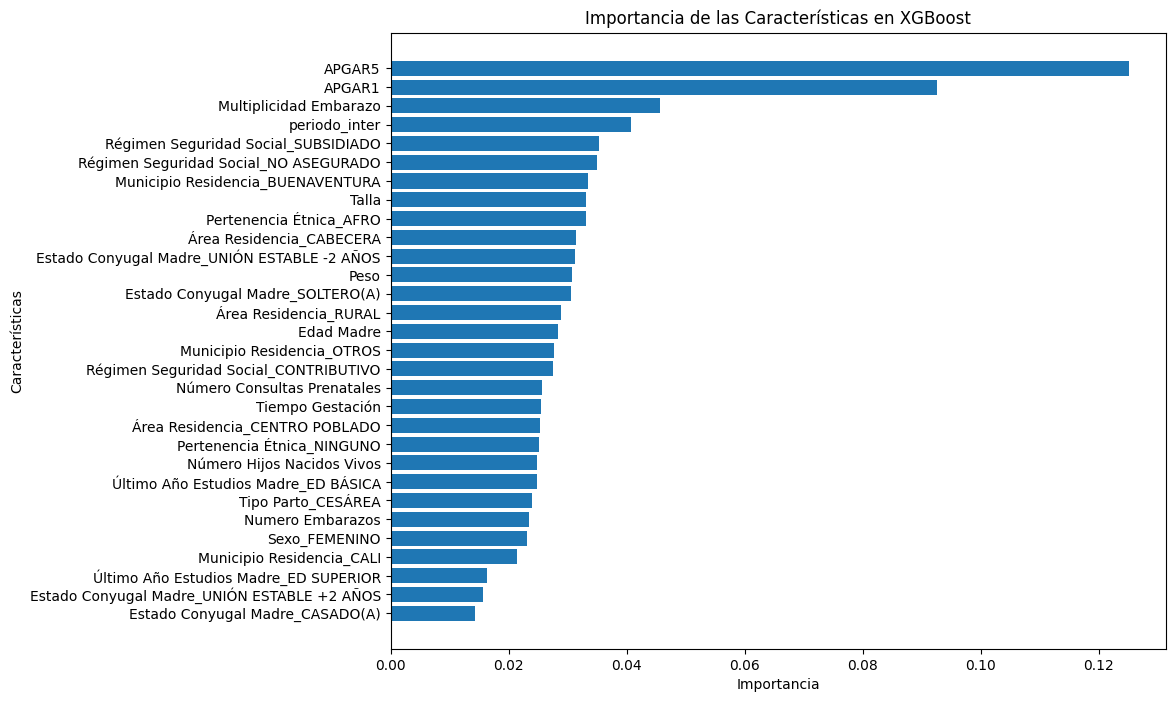

In [114]:
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

# Suponiendo que 'X_train_under' es un DataFrame de pandas y 'y_train_under' son las etiquetas correspondientes
# Asegúrate de que X_train_under y y_train_under estén definidos correctamente y contengan tus datos

# Entrenar el modelo de XGBoost
modelo_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7)
modelo_xgb.fit(X_train_under, y_train_under)

# Obtener las importancias y los nombres de las características
importancias = modelo_xgb.feature_importances_
nombres_caracteristicas = X_train_under.columns

# Filtrar características con importancia mayor que 0
indices_filtrados = np.where(importancias > 0)[0]
importancias_filtradas = importancias[indices_filtrados]
nombres_filtrados = [nombres_caracteristicas[i] for i in indices_filtrados]

# Ordenar las características por importancia en orden ascendente
indices_ordenados = np.argsort(importancias_filtradas)
nombres_ordenados = [nombres_filtrados[i] for i in indices_ordenados]
importancias_ordenadas = importancias_filtradas[indices_ordenados]

# Crear la gráfica
plt.figure(figsize=(10, 8))
plt.title("Importancia de las Características en XGBoost")
plt.barh(range(len(indices_ordenados)), importancias_ordenadas, align='center')
plt.yticks(range(len(indices_ordenados)), nombres_ordenados)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()



In [111]:
X_train_under.columns

Index(['Peso', 'Talla', 'Tiempo Gestación', 'Número Consultas Prenatales',
       'Multiplicidad Embarazo', 'APGAR1', 'APGAR5', 'Edad Madre',
       'Número Hijos Nacidos Vivos', 'Numero Embarazos', 'periodo_inter',
       'Area Nacimiento_CABECERA', 'Area Nacimiento_CENTRO POBLADO',
       'Area Nacimiento_RURAL', 'Sitio Parto_DOMICILIO',
       'Sitio Parto_INSTITUCIÓN', 'Sitio Parto_OTRO', 'Sexo_FEMENINO',
       'Sexo_MASCULINO', 'Parto Atendido Por_MÉDICO',
       'Parto Atendido Por_OTRA PERSONA', 'Tipo Parto_CESÁREA',
       'Tipo Parto_ESPONTÁNEO', 'Tipo Parto_IGNORADO',
       'Tipo Parto_INSTRUMENTADO', 'Pertenencia Étnica_AFRO',
       'Pertenencia Étnica_INDÍGENA', 'Pertenencia Étnica_NINGUNO',
       'Pertenencia Étnica_PALENQUERO', 'Pertenencia Étnica_RAIZAL',
       'Pertenencia Étnica_ROM', 'Estado Conyugal Madre_CASADO(A)',
       'Estado Conyugal Madre_SEPARADO(A)/DIVORCIADO(A)',
       'Estado Conyugal Madre_SIN INFORMACIÓN',
       'Estado Conyugal Madre_SOLTERO(A)'